In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from torch.nn import functional as F
import random

model_name = 'gpt2'
device = 'cuda'
device = 'cpu'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

/home/hinski2/miniconda3/envs/ml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model.transformer

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [3]:
def tokenize(word):
    ids = tokenizer(word, return_tensors='pt')['input_ids'][0]
    return [tokenizer.decode(n) for n in ids]

def cos(a, b):
    return a.dot(b) / (a.dot(a) * b.dot(b)) ** 0.5

emb = model.transformer.wte.weight.detach().cpu().numpy()
N = 50257

words = 'student university cat dog elephant car aircraft love christmas holiday'.split()
words = 'transformer convolutional recursive programming programing Transformer'.split()

for w in words:
    #tokens = tokenize(' ' + w)
    tokens = tokenize(' ' + w)
    print (tokens)
    token_id = tokenizer.encode(tokens[0])[0]
    
    score = [(cos(emb[i], emb[token_id]), tokenizer.decode(i)) for i in range(N)]
    score.sort(reverse=True)
    for s, w in score[:15]:
        print ('   ', s, f'[{w}]')
    print()
    


[' transformer']
    1.0 [ transformer]
    0.58790964 [ transform]
    0.5464876 [ amplifier]
    0.53818107 [ Transformers]
    0.5303207 [ capacitor]
    0.5285322 [ generator]
    0.5252858 [Transform]
    0.5223492 [ converter]
    0.5216779 [ voltage]
    0.5168441 [ resistor]
    0.51623654 [ transistor]
    0.51273644 [transform]
    0.50098366 [�]
    0.5009378 [�]
    0.50071627 []

[' conv', 'olution', 'al']
    1.0 [ conv]
    0.6336839 [ Conv]
    0.53181016 [conv]
    0.4755847 [ convoy]
    0.4372832 [ convict]
    0.40430278 [ convol]
    0.39382347 [ inmates]
    0.3898271 [ convent]
    0.3873719 [ recon]
    0.3827967 [ recurrent]
    0.38173962 [ seizures]
    0.37846664 [ prisoners]
    0.3750396 []
    0.37503013 []
    0.37488514 [ transports]

[' recursive']
    1.0 [ recursive]
    0.5490223 [ nested]
    0.5423405 [�]
    0.54178834 [ externalTo]
    0.54163504 [quickShip]
]   0.5413896 [
    0.5408 []
    0.5402911 []
    0.53994167 [�]
    0.5399191 []

In [4]:
emb_pos = model.transformer.wpe.weight.detach().cpu().numpy()


In [5]:
emb_pos.shape

(1024, 768)

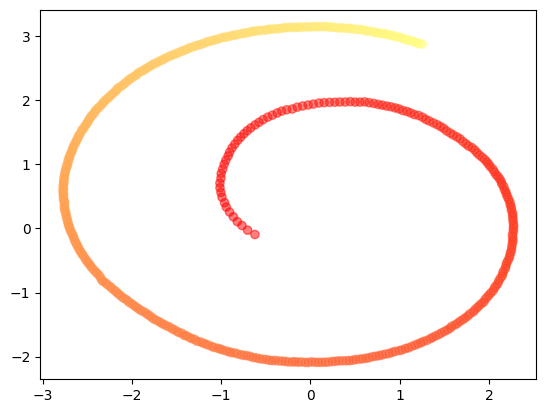

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(emb_pos)
M = 500
S = 10
X_pca = X_pca[S:S+M,:]

cs = [(1.0, int(k)/M, 0.5*int(k)/M) for k in range(X_pca.shape[0])]

# Plot the two most important components
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c=cs)
None